# Initial Data Preparation

## Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas import DataFrame
from sklearn.linear_model import LinearRegression

%matplotlib inline

## Constants

In [33]:
TOTAL_SAMPLE_SIZE = 1460

## Gather the Data

In [32]:
# Import the train.csv file

data = pd.read_csv('./train.csv')

## Preliminary Data Visualization

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Descriptions

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
with open('./data_description_abbreviated.txt', 'r') as file:
    abbreviated_data_description = file.read()
    
print(abbreviated_data_description)

- SalePrice - the property's sale price in dollars -- the target variable
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: 

## Full Feature and Target Descriptions

In [18]:
# with open('./data_description.txt', 'r') as file:
#     data_description = file.read()
    
# print(data_description)

## Test Feature & Target

In [7]:
# Create X using short notation
x = data[['YearBuilt']]
# Create x (commented out) using DataFrame notation
# x = DataFrame(data, columns=['YearBuilt'])
y = DataFrame(data, columns=['SalePrice'])

### Display a sample scatter plot

Text(0, 0.5, 'Sale Price')

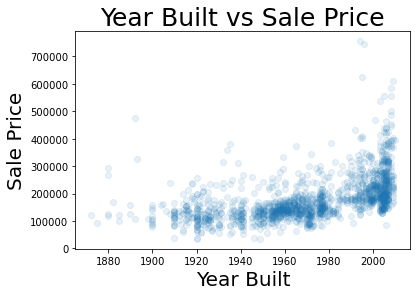

In [8]:
plt.scatter(x, y, alpha=0.1)
plt.title('Year Built vs Sale Price', fontsize=25)
plt.xlabel('Year Built', fontsize=20)
plt.ylabel('Sale Price', fontsize=20)

In [9]:
regr = LinearRegression()
regr.fit(x, y)

LinearRegression()

In [10]:
print(regr.coef_)

[[1375.37346794]]


### Test a sample regression with the scatter plot

Text(0, 0.5, 'Sale Price')

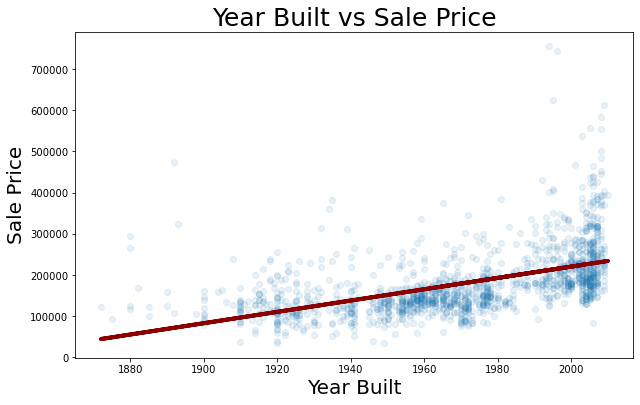

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.1)
plt.plot(x, regr.predict(x), color='darkred', linewidth=4)
plt.title('Year Built vs Sale Price', fontsize=25)
plt.xlabel('Year Built', fontsize=20)
plt.ylabel('Sale Price', fontsize=20)

## R-Squared Value (Goodness of Fit)
The amount of variation in price that can be explained by the year the house was built.

In [12]:
regr.score(x, y)

0.27342162073249154

## Precautions to Avoid Overfitting

#### Ratio of Sample Count to Feature Count 

Because this data set consists of only 1460 samples, but 81 features. This ratio of low sample count to high feature count can lead to overfitting.

Two simple solutions are as follows: 

-- Lean towards Linear Regression, as opposed to Logistic Regression

-- Carefully consider all non-numerical data

-- Consider removing numerical data that is discrete and non-relevant (such as arbitrary numerical values for house types)

#### Managing Values of Zero for Non-ubiquitous Features

Furthermore, several of the remaining features are not present in every sample. 

In the non-representing data, the values of the feature are set to zero by default. 

To avoid overfitting, these data values can instead be set to the average value of all representing data for that feature. 

In [13]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [20]:
# Print data_sample_abbreviated.txt content
# for i in range(0, len(data.columns)):
#     col_name = data.columns[i]
#     print(col_name)
#     for j in range(0, 5):
#         print('  ', data[col_name].values[j])


## Separate Samples Into Subsamples

In [26]:
# Separate all data samples into their respective zoning types

names_of_zones = []
for i in range(0, len(data['MSZoning'].values.tolist())):
    curr_zone = data['MSZoning'].values[i]
    found = False
    j = 0
    for k in range(0, len(names_of_zones)):
        if curr_zone in names_of_zones[k][0]:
            found = True
            j = k
    if found:
        names_of_zones[j][1] = names_of_zones[j][1] + 1
    else:
        names_of_zones.append([curr_zone, 1])

for i in range(0, len(names_of_zones)):
    print(names_of_zones[i])
    

['RL', 1151]
['RM', 218]
['FV', 65]
['RH', 16]


## Observations

The total number of commercial properties is only `9`.

This is not enough data to perform multivariable regression, so the `C` type properties will need to be treated separately.

In [35]:
# non_commercial_data = data[~data['MSZoning'].isin(['C (all)'])]

#### Test that Updated Data Count is Correct

In [36]:
# counter = 0
# for i in range(0, len(data['MSZoning'].values.tolist())):
#     counter += 1
    
# if counter == TOTAL_SAMPLE_SIZE - 10:
#     print(True)
# else:
#     print(counter)
#     print(False)

In [37]:
for i in range len(data):
    print(data[i].column)

SyntaxError: invalid syntax (<ipython-input-37-48feafa167ac>, line 1)